In [6]:
import pandas as pd
import warnings
%load_ext autoreload
%autoreload 2
import pipeline
warnings.filterwarnings('ignore')
mobility = pd.read_csv("Global_Mobility_Report.csv")
google = mobility[mobility['country_region_code'] == 'US'].dropna().iloc[:, 3:]
google.sub_region_2 = google.sub_region_2.str.upper() 
google.head(5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
112074,BALDWIN COUNTY,2020-02-15,17.0,12.0,55.0,8.0,6.0,-2.0
112075,BALDWIN COUNTY,2020-02-16,8.0,8.0,-12.0,7.0,-3.0,2.0
112076,BALDWIN COUNTY,2020-02-17,9.0,9.0,31.0,7.0,-3.0,1.0
112077,BALDWIN COUNTY,2020-02-18,7.0,8.0,21.0,0.0,2.0,0.0
112078,BALDWIN COUNTY,2020-02-19,12.0,9.0,41.0,8.0,3.0,-1.0


In [7]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import geopandas as gpd
google.set_index('date', inplace=True)
%matplotlib inline
sns.set(rc={'figure.figsize':(21, 4)})

Text(0.5,1,'Mobility Change in Cook County')

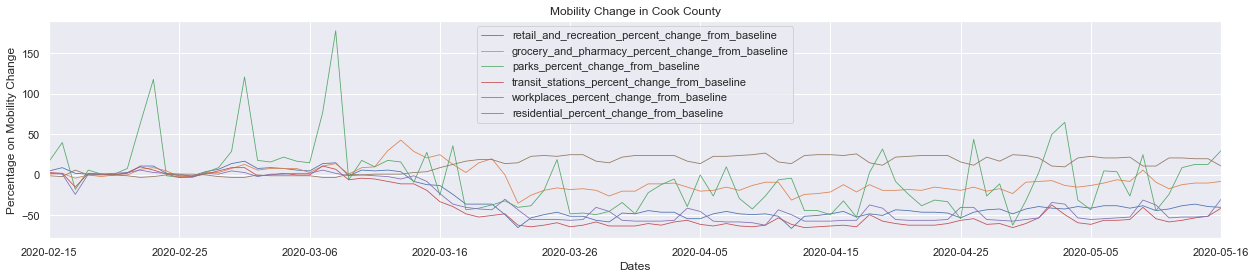

In [8]:
google_2 = google[google['sub_region_2'] == 'COOK COUNTY']
google_2.plot(linewidth=0.8)
plt.xlabel("Dates")
plt.ylabel("Percentage on Mobility Change")
plt.title('Mobility Change in Cook County')

Text(0.5,1,'Mobility Change in Ada County')

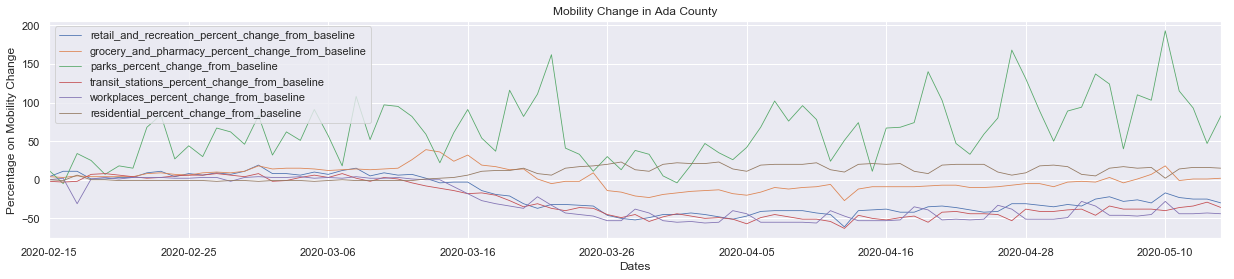

In [9]:
google_3 = google[google['sub_region_2'] == 'ADA COUNTY']
google_3.plot(linewidth=0.8)
plt.xlabel("Dates")
plt.ylabel("Percentage on Mobility Change")
plt.title('Mobility Change in Ada County')

In [10]:
weather_counties = pd.read_csv("US_counties_COVID19_health_weather_data.csv")
weather_counties = weather_counties[['date', 'county', 'state', 'fips', 'cases', 'deaths', 'stay_at_home_announced', 'stay_at_home_effective', 'lat', 'lon', 'area_sqmi', 'mean_temp', 'precipitation']]
weather_counties.head(5)

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,area_sqmi,mean_temp,precipitation
0,2020-01-21,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,2086.572826,44.1,0.00
1,2020-01-22,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,2086.572826,44.8,0.29
2,2020-01-23,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,2086.572826,49.9,0.54
3,2020-01-24,Cook,Illinois,17031,1,0,no,no,41.840039,-87.816716,944.990922,36.1,0.16
4,2020-01-24,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,2086.572826,51.5,0.32


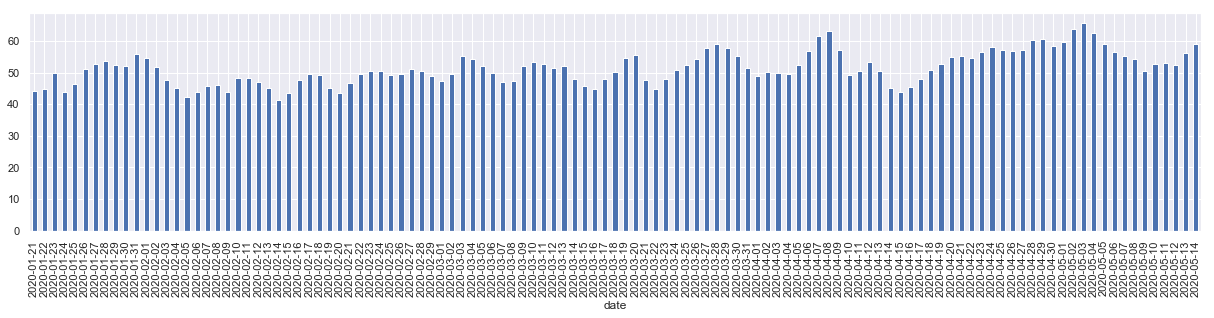

In [11]:
by_date= weather_counties.groupby('date')['mean_temp'].mean()
by_date.plot(kind='bar')

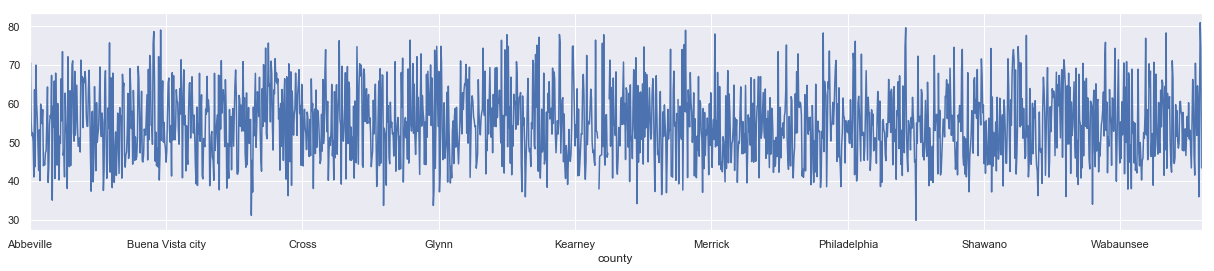

In [12]:
by_county= weather_counties.groupby('county')['mean_temp'].mean()
by_county.plot()

In [13]:
interventions = pd.read_csv("interventions.csv")
interventions.head(5)

,FIPS,STATE,AREA_NAME,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban
0,0,US,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,alabama,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0
2,1001,AL,autauga county,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0
3,1003,AL,baldwin county,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0
4,1005,AL,barbour county,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0


In [14]:
weather_counties.fips= weather_counties.fips.convert_objects(convert_numeric=True)
weather_counties_mobility = interventions.merge(weather_counties, left_on='FIPS', right_on='fips')
del weather_counties_mobility['fips']
del weather_counties_mobility['county']
del weather_counties_mobility['state']
weather_counties_mobility.AREA_NAME = weather_counties_mobility.AREA_NAME.str.upper() 
weather_counties_mobility = weather_counties_mobility.merge(google, left_on='AREA_NAME', right_on='sub_region_2')
del weather_counties_mobility['sub_region_2']
weather_counties_mobility = weather_counties_mobility.rename(columns={"AREA_NAME": "county"})

In [18]:
train, test = train_test_split(weather_counties_mobility, test_size = 0.33, random_state = 42)

In [19]:
cont_vars = ['stay at home', 'mean_temp', 'precipitation'] 
cat_vars = ['date', 'FIPS', 'STATE', 'county', 'stay at home', 'stay_at_home_announced', 'stay_at_home_effective',
       'lat', 'lon', ]
train = pipeline.impute(train)
test = pipeline.impute(test)

In [21]:
train[cont_vars], scaler = pipeline.normalize(train[cont_vars])
test[cont_vars], scaler = pipeline.normalize(test[cont_vars], scaler)